In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
nums=np.arange(7)+3
nums2=np.arange(6)+3

dims=np.loadtxt('questruntime/dim.dat')
sruntimes=np.loadtxt('questruntime/sruntime.dat')
cruntimes=np.loadtxt('questruntime/cruntime.dat')
eruntimes=np.loadtxt('questruntime/eruntimes.dat')
pruntimes=np.loadtxt('questruntime/pruntime.dat')


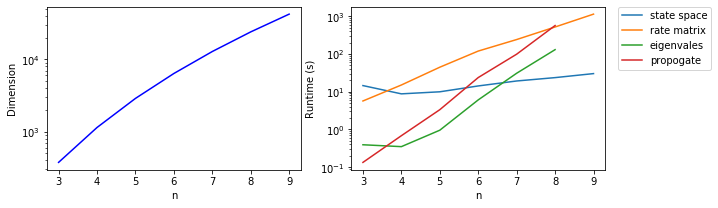

In [4]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.semilogy(nums,dims, 'b-')
plt.xlabel("n")
plt.ylabel("Dimension")
plt.subplot(122)
plt.semilogy(nums,sruntimes, label="state space")
plt.semilogy(nums,cruntimes, label="rate matrix")
plt.semilogy(nums2,eruntimes, label="eigenvales")
plt.semilogy(nums2,pruntimes, label="propogate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n")
plt.ylabel("Runtime (s)")
plt.show()

In [5]:
a,b=np.polyfit(nums2,np.log(pruntimes),1)
[np.exp(b+a*n) for n in nums2]

[0.1303514260919058,
 0.6970408995737324,
 3.727354814944579,
 19.931648092653912,
 106.582446644619,
 569.9387165549986]

In [16]:
filebase="data/h2o2/5/"
propogate=np.load(filebase+"propogate.npy")
temperatures=np.load(filebase+"temperatures.npy")
pressures=np.load(filebase+"pressures.npy")
times=np.load(filebase+"times.npy")
multiindices=np.load(filebase+"multiindices.npy")
spatoms=np.load(filebase+"spatoms.npy")

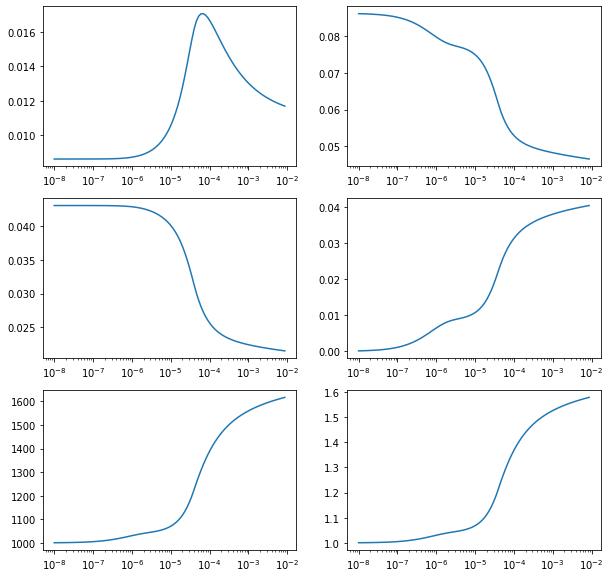

In [17]:
plt.figure(figsize=(10, 10))
plt.subplot(321)

plt.semilogx(times,np.sum(propogate.dot(np.diag((multiindices[:,1]+multiindices[:,2]+multiindices[:,4]+multiindices[:,6])/np.sum(multiindices,axis=1))),axis=1))
plt.subplot(322)
plt.semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,0]/np.sum(multiindices,axis=1))),axis=1))
plt.subplot(323)
plt.semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,3]/np.sum(multiindices,axis=1))),axis=1))
plt.subplot(324)
plt.semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,5])/np.sum(multiindices,axis=1)),axis=1))
plt.subplot(325)
plt.semilogx(times,np.sum(propogate.dot(np.diag(temperatures)),axis=1))
plt.subplot(326)
plt.semilogx(times,np.sum(propogate.dot(np.diag(pressures)),axis=1))